<h1>IPL Data Analysis<h1>

The dataset that we use in this notebook is IPL (Indian Premier League) Dataset posted on Kaggle Datasets sourced from cricsheet.

Questions:
* How many matches we've got in the dataset?

* How many seasons we've got in the dataset?

* Which Team had won by maximum runs?

* Which Team had won by maximum wicket?

* Which Team had won by closest Margin (minimum runs)?

* Which Team had won by minimum wicket?

* Which Season had most number of matches?

* Which IPL Team is more successful?

* Has Toss-winning helped in winning matches?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style=("Darkgrid")
plt.rcParams['figure.figsize']=(14,8)

In [8]:
filename='/Users/nityanandwachche/Desktop/matches.csv'
df=pd.read_csv(filename,sep=',',decimal='.',header=0)

In [9]:
df.shape

(636, 18)

In [10]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [14]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


<h1>How many matches we’ve got in the dataset?<h1>

In [15]:
df['id'].max()

636

<h1>How many seasons we've got in the dataset?<h1>

In [16]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [21]:
len(df['season'].unique())

10

<h1>Which Team had won by maximum runs?<h1>

In [26]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [ ]:
<h1>Which Team had won by maximum wicket?<h1>

In [27]:
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

<h1>Which Team had won by closest Margin (minimum runs)?<h1>

In [30]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

<h1>Which Team had won by minimum wicket?<h1>

In [31]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

<h1>Which Season had most number of matches?<h1>

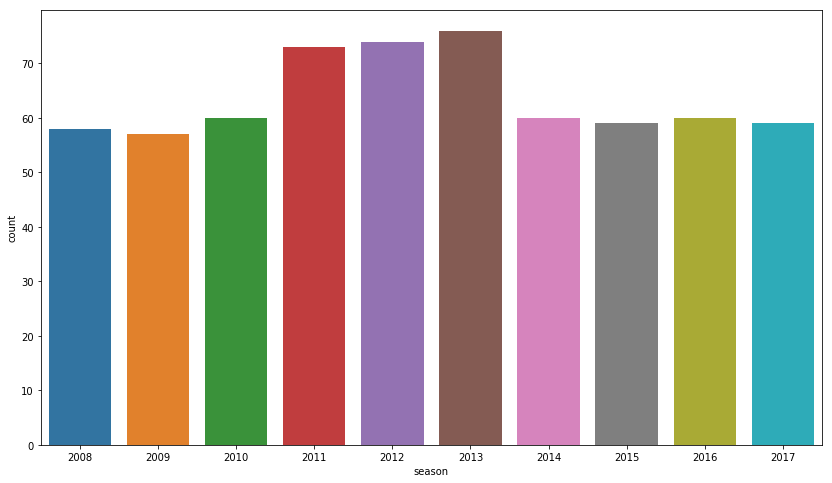

In [35]:
sns.countplot(x='season',data=df)
plt.show()

<h1>The most Successful IPL Team<h1>

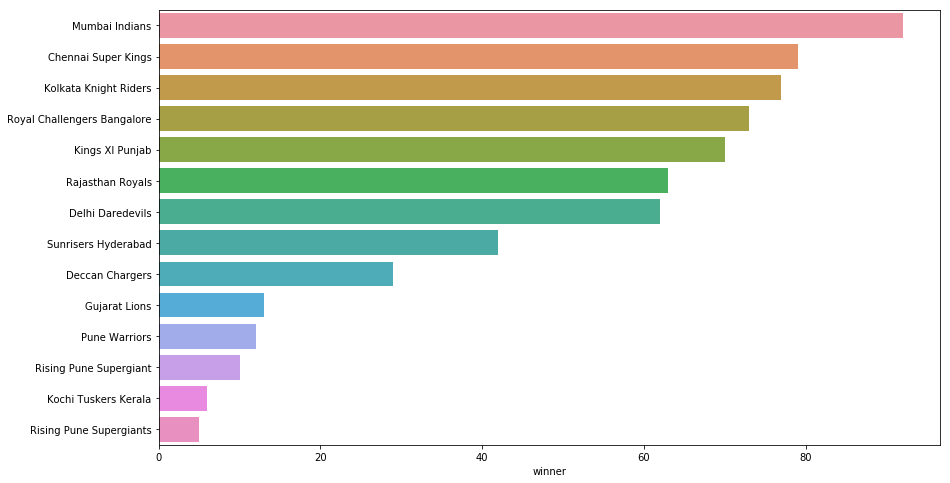

In [40]:
data=df.winner.value_counts()
sns.barplot(x=data,y=data.index,orient='h');

<h1>Top player of the match Winners<h1>

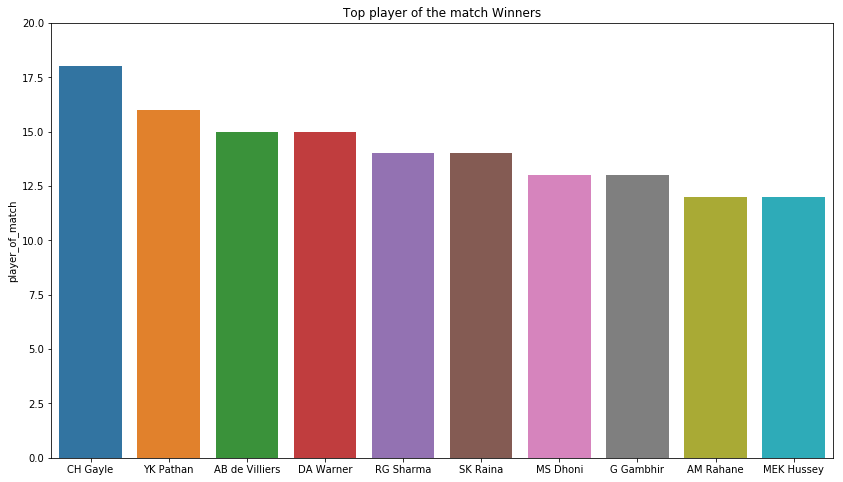

In [43]:
top_players=df.player_of_match.value_counts()[:10]
fig,ax=plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("count")
ax.set_title("Top player of the match Winners")
sns.barplot(x=top_players.index,y=top_players,orient='v');
plt.show()

<h1>Has Toss-winning helped in Match-winning?<h1>

How many Toss winning teams have won the matches?

In [46]:
luck=df['toss_winner']==df['winner']
luck.groupby(luck).size()

False    311
True     325
dtype: int64

What's the percentage of it?

In [48]:
round(luck.groupby(luck).size()/luck.count()*100,2)

False    48.9
True     51.1
dtype: float64

<h1>Team Performance <h1>

In [53]:
df[df['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Rajasthan Royals               31.0
Rising Pune Supergiants        26.5
Mumbai Indians                 25.0
Chennai Super Kings            24.0
Pune Warriors                  23.0
Kolkata Knight Riders          23.0
Royal Challengers Bangalore    22.5
Kings XI Punjab                22.5
Rising Pune Supergiant         20.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            16.0
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

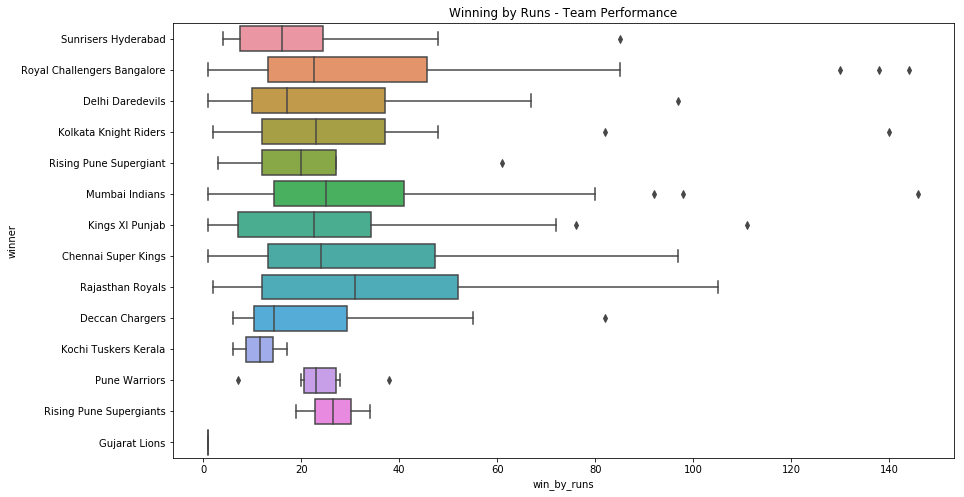

In [60]:
fig,ax= plt.subplots()
ax.set_title("Winning by Runs - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_runs', data=df[df['win_by_runs']>0], orient = 'h');
plt.show()


In [61]:
df[df['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending=False)

winner
Kochi Tuskers Kerala           7.5
Sunrisers Hyderabad            7.0
Royal Challengers Bangalore    7.0
Rising Pune Supergiants        7.0
Kolkata Knight Riders          7.0
Pune Warriors                  6.5
Rising Pune Supergiant         6.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kings XI Punjab                6.0
Gujarat Lions                  6.0
Delhi Daredevils               6.0
Deccan Chargers                6.0
Chennai Super Kings            6.0
Name: win_by_wickets, dtype: float64

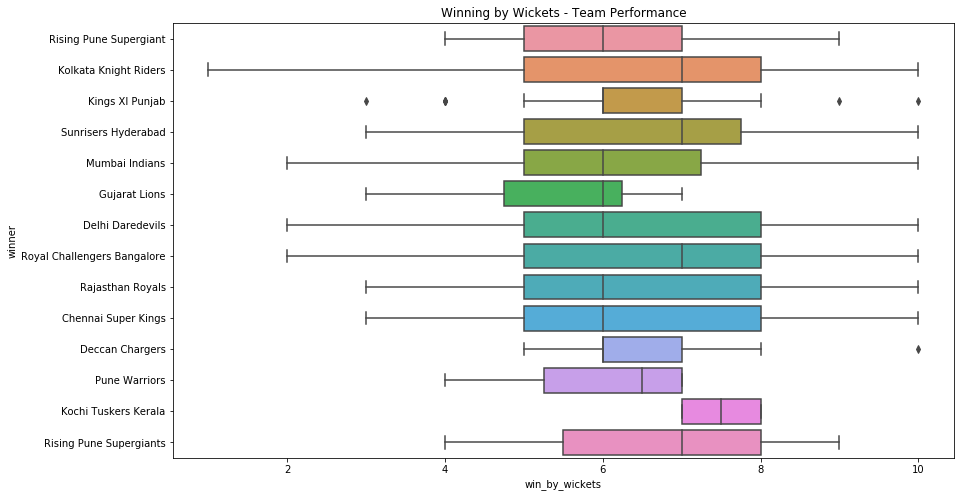

In [66]:
fig,ax=plt.subplots()
ax.set_title("Winning by Wickets - Team Performance")
sns.boxplot(y='winner',x='win_by_wickets', data=df[df['win_by_wickets']>0],orient='h');
plt.show()